In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mdates
import numpy as np

# Read in daily data for NSE TCS

In [2]:
infile = 'data/t_data.csv'
df = pd.read_csv(infile, index_col=0, parse_dates=True)

In [3]:
# #Function Used For Calculation Suptrend alternatively talib or pandas_ta can be Implemented
# def calculate_supertrend(df, period=7, multiplier=3):
#     df['ATR'] = 0.0
#     df['SUPERTs_7_3.0'] = 0.0
#     df['SUPERTl_7_3.0'] = 0.0
#     df['SUPERT_7_3.0'] = 0.0
#     df['SUPERTd_7_3.0'] = 0

#     atr_multiplier = multiplier

#     for i in range(1, len(df)):
#         high_low = df['High'][i] - df['Low'][i]
#         high_close = abs(df['High'][i] - df['Close'][i-1])
#         low_close = abs(df['Low'][i] - df['Close'][i-1])

#         true_range = max(high_low, high_close, low_close)
#         df.at[i, 'ATR'] = ((df.at[i-1, 'ATR'] * (period - 1)) + true_range) / period

#         df.at[i, 'SUPERTs_7_3.0'] = df.at[i, 'Close'] + (atr_multiplier * df.at[i, 'ATR'])
#         df.at[i, 'SUPERTl_7_3.0'] = df.at[i, 'Close'] - (atr_multiplier * df.at[i, 'ATR'])

#         if df.at[i, 'Close'] > df.at[i, 'SUPERTs_7_3.0']:
#             df.at[i, 'SUPERTd_7_3.0'] = 1
#             df.at[i, 'SUPERT_7_3.0'] = df.at[i, 'SUPERTl_7_3.0']
#         else:
#             df.at[i, 'SUPERTd_7_3.0'] = -1
#             df.at[i, 'SUPERT_7_3.0'] = df.at[i, 'SUPERTs_7_3.0']

#         if df.at[i-1, 'SUPERTd_7_3.0'] == 1 and df.at[i, 'Close'] < df.at[i, 'SUPERT_7_3.0']:
#             df.at[i, 'SUPERT_7_3.0'] = df.at[i, 'SUPERTs_7_3.0']
#             df.at[i, 'SUPERTd_7_3.0'] = -1
#         elif df.at[i-1, 'SUPERTd_7_3.0'] == -1 and df.at[i, 'Close'] > df.at[i, 'SUPERT_7_3.0']:
#             df.at[i, 'SUPERT_7_3.0'] = df.at[i, 'SUPERTl_7_3.0']
#             df.at[i, 'SUPERTd_7_3.0'] = 1

#     return df['SUPERT_7_3.0']

In [4]:
#Function For Color Coding Supertrend
def color(super_trend):
    UP = []
    DOWN = []
    for i in range(len(super_trend)):
        if super_trend['SUPERTl_7_3.0'][i] < super_trend['Close'][i]:
            UP.append(int(super_trend['SUPERTl_7_3.0'][i]))
            DOWN.append(np.nan)
        elif super_trend['SUPERTl_7_3.0'][i] > super_trend['Close'][i]:
            DOWN.append(int(super_trend['SUPERTs_7_3.0'][i]))
            UP.append(np.nan)
        else:
            UP.append(np.nan)
            DOWN.append(np.nan)
    super_trend['up'] = UP
    super_trend['down'] = DOWN
    return super_trend        

In [5]:
#Fuction Color Applied And Df Generated 
super_trend = color(df)

In [6]:
# Data Extracted And New Variable Applied
up_super_trend = super_trend[['up']]
down_super_trend = super_trend[['down']]

In [7]:
ic = [
    #Supertrend
    mpf.make_addplot(up_super_trend,color = 'green',panel=0,),
    mpf.make_addplot(down_super_trend,color = '#FF8849',panel=0,),
    
]

In [8]:
#Fill Between Method Appled
fill_between_up=dict(y1=super_trend['up'].values,y2=super_trend['Low'].values,alpha=0.05,color='g')
fill_between_down=dict(y1=super_trend['down'].values,y2=super_trend['High'].values,alpha=0.05,color='r')

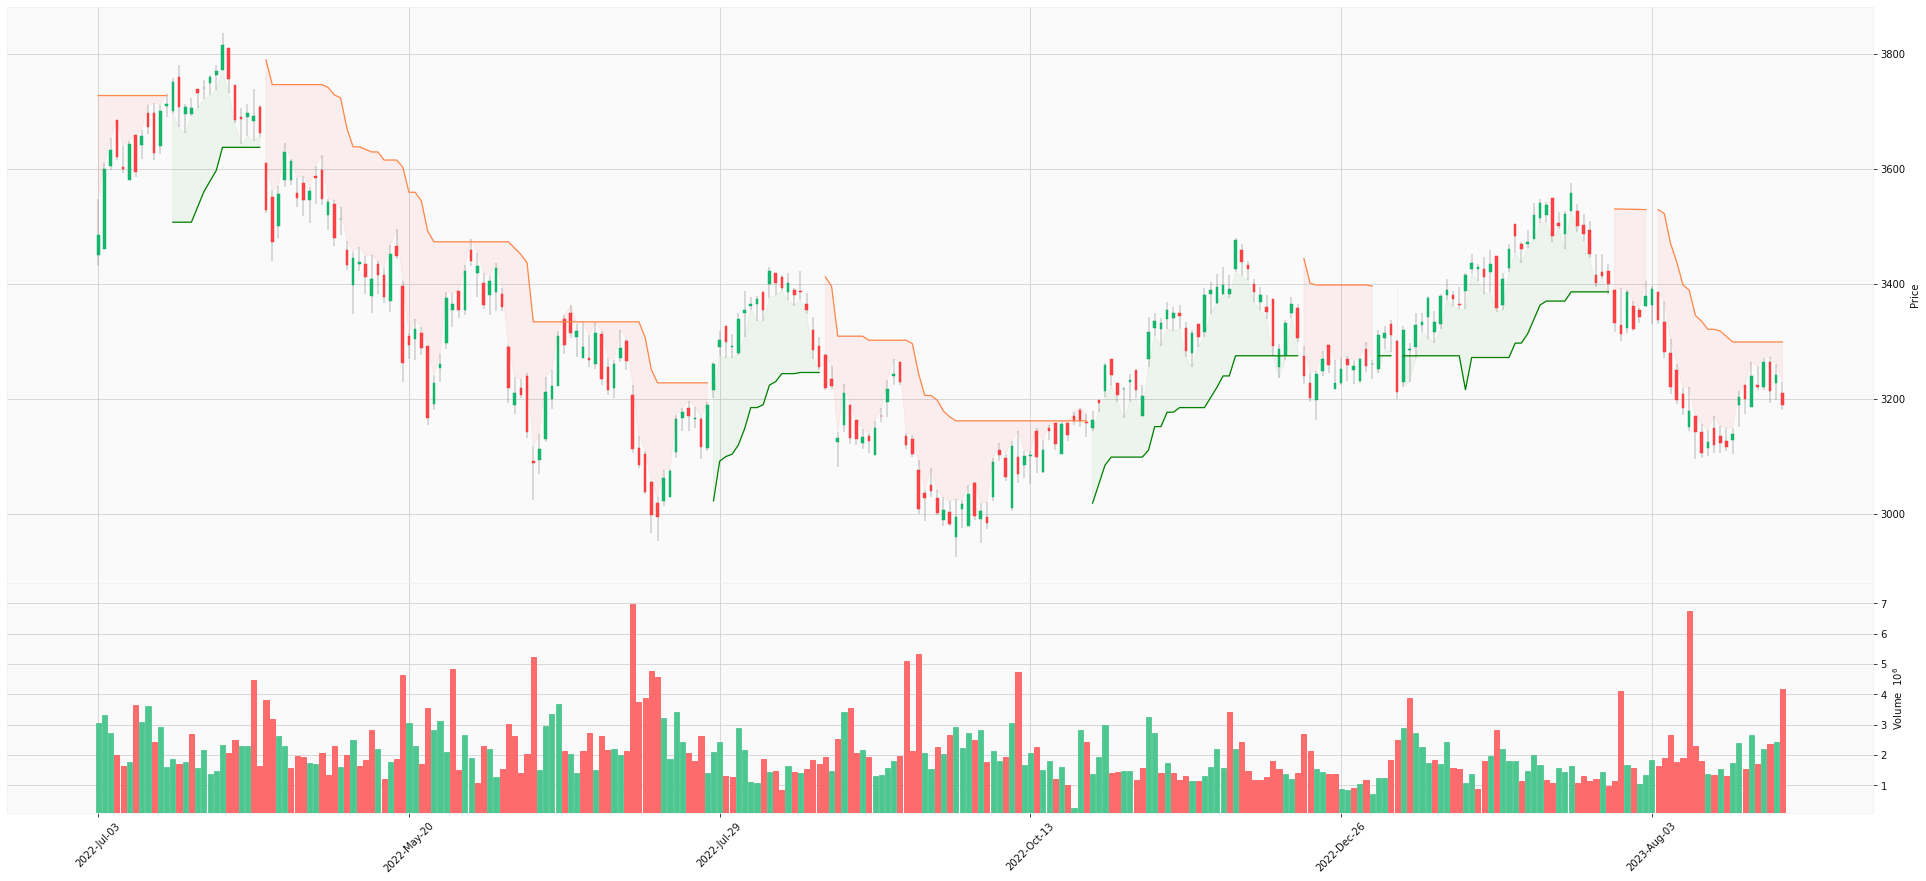

In [9]:
mpf.plot(
    df,
    volume=True,
    type="candle", 
    style="yahoo",
    addplot=ic,
    figscale=1.2,
    fill_between = [fill_between_up,fill_between_down],
    figsize=(36,16,)
)